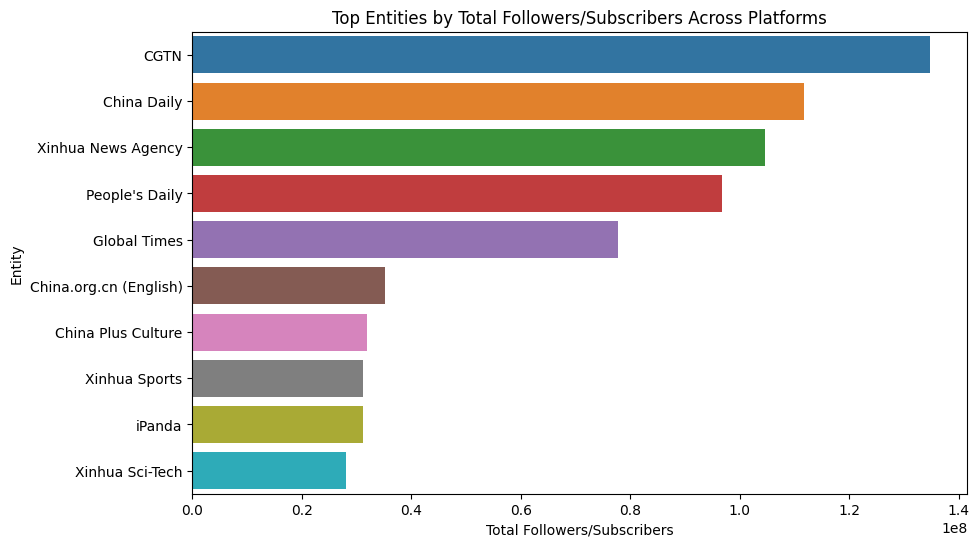

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_excel('/content/CANIS_PRC_state_media_on_social_media_platforms-2023-11-03.xlsx')

# Define the columns for follower counts
follower_counts_columns = ['X (Twitter) Follower #', 'Facebook Follower #', 'Instagram Follower #',
                           'YouTube Subscriber #', 'TikTok Subscriber #']

# Calculate total followers/subscribers
data['Total Followers/Subscribers'] = data[follower_counts_columns].fillna(0).sum(axis=1)

# Select top entities for visualization
top_entities_data = data.nlargest(10, 'Total Followers/Subscribers')

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Followers/Subscribers', y='Name (English)', data=top_entities_data)
plt.title('Top Entities by Total Followers/Subscribers Across Platforms')
plt.xlabel('Total Followers/Subscribers')
plt.ylabel('Entity')
plt.show()

In [ ]:
 data.columns

Index(['Name (English)', 'Name (Chinese)', 'Region of Focus', 'Language',
       'Entity owner (English)', 'Entity owner (Chinese)',
       'Parent entity (English)', 'Parent entity (Chinese)',
       'X (Twitter) handle', 'X (Twitter) URL', 'X (Twitter) Follower #',
       'Facebook page', 'Facebook URL', 'Facebook Follower #',
       'Instragram page', 'Instagram URL', 'Instagram Follower #',
       'Threads account', 'Threads URL', 'Threads Follower #',
       'YouTube account', 'YouTube URL', 'YouTube Subscriber #',
       'TikTok account', 'TikTok URL', 'TikTok Subscriber #'],
      dtype='object')

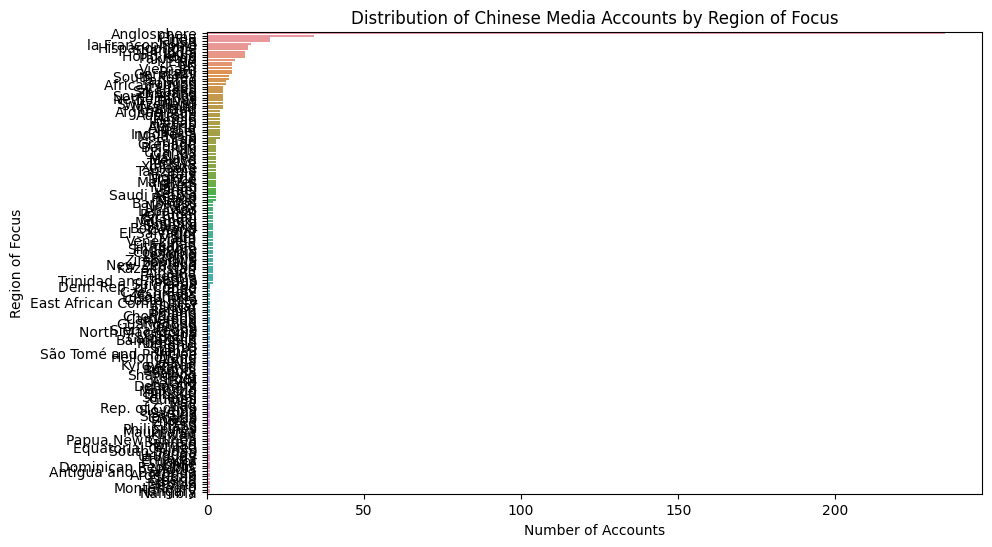

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data

# Visualization: Distribution of Accounts by Region
plt.figure(figsize=(10, 6))
sns.countplot(y='Region of Focus', data=data, order=data['Region of Focus'].value_counts().index)
plt.title('Distribution of Chinese Media Accounts by Region of Focus')
plt.xlabel('Number of Accounts')
plt.ylabel('Region of Focus')
plt.show()

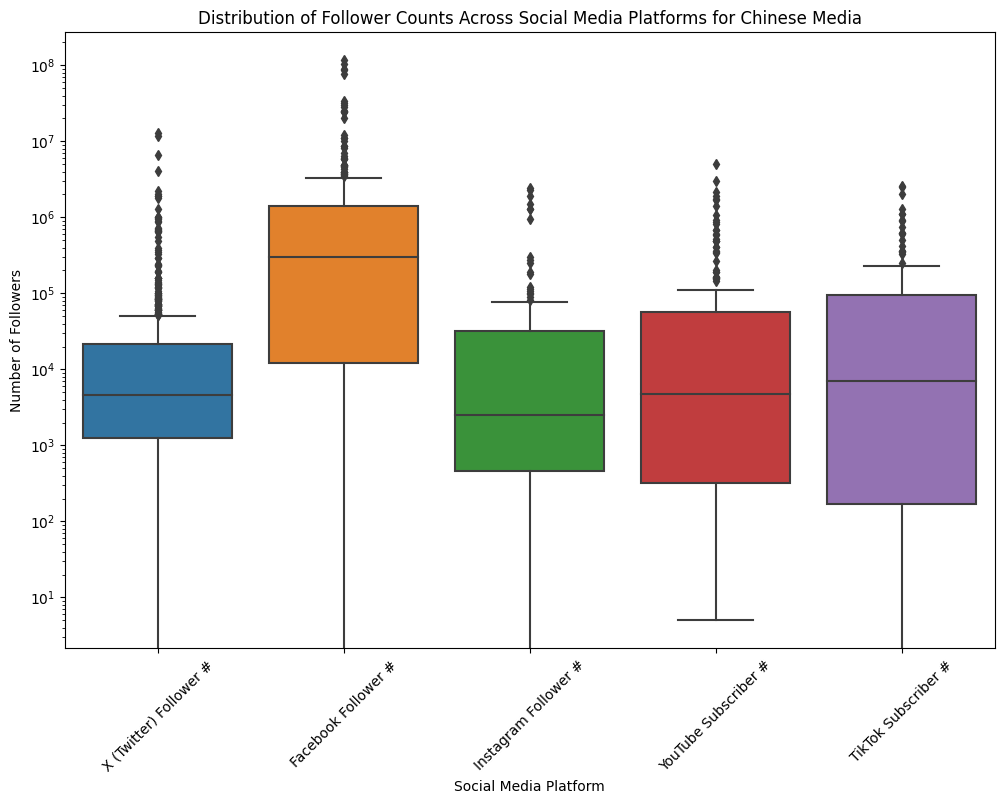

In [ ]:
# Aggregate the follower counts for each platform
follower_columns = ['X (Twitter) Follower #', 'Facebook Follower #', 'Instagram Follower #', 'YouTube Subscriber #', 'TikTok Subscriber #']
follower_data = data[follower_columns].melt(var_name='Platform', value_name='Followers')

# Visualization: Follower Counts Across Platforms
plt.figure(figsize=(12, 8))
sns.boxplot(x='Platform', y='Followers', data=follower_data)
plt.title('Distribution of Follower Counts Across Social Media Platforms for Chinese Media')
plt.xlabel('Social Media Platform')
plt.ylabel('Number of Followers')
plt.yscale('log')  # Log scale due to wide range of values
plt.xticks(rotation=45)
plt.show()

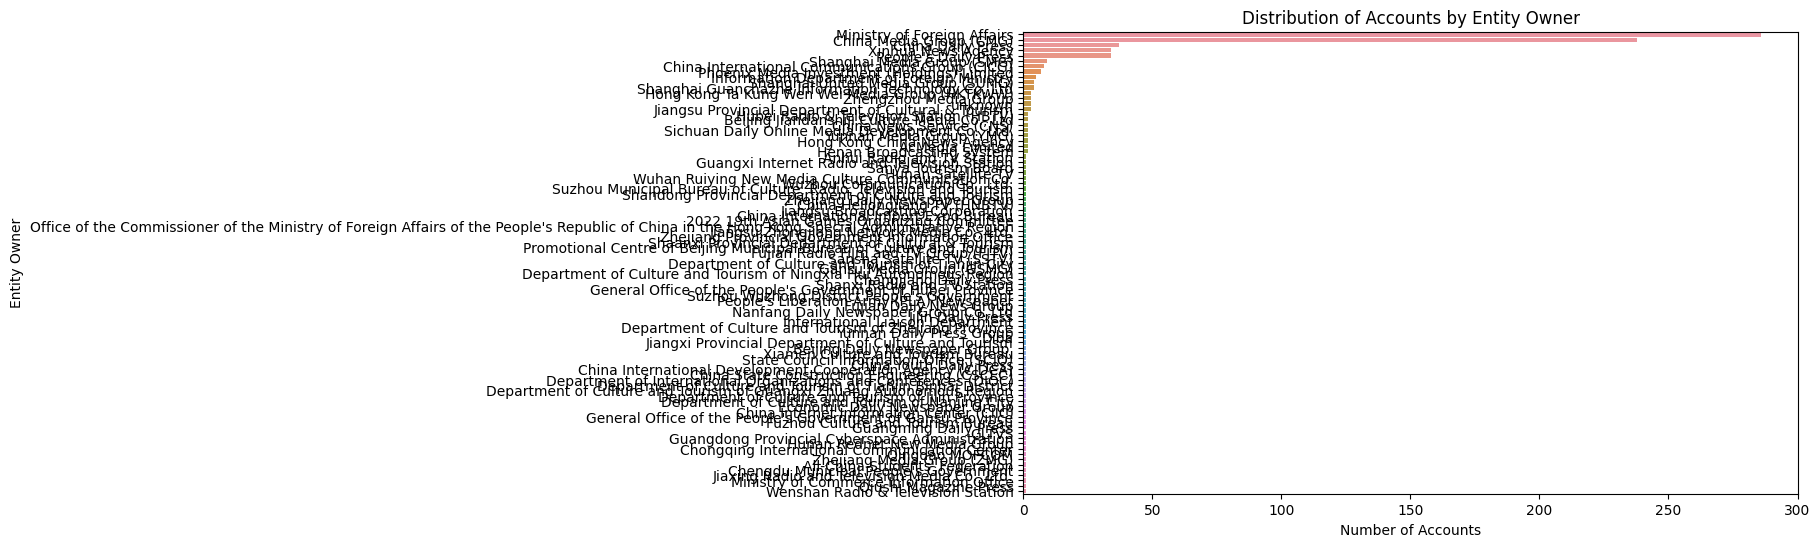

In [ ]:
# Visualization: Distribution of Accounts by Entity Owner
plt.figure(figsize=(10, 6))
sns.countplot(y='Entity owner (English)', data=data, order=data['Entity owner (English)'].value_counts().index)
plt.title('Distribution of Accounts by Entity Owner')
plt.xlabel('Number of Accounts')
plt.ylabel('Entity Owner')
plt.show()

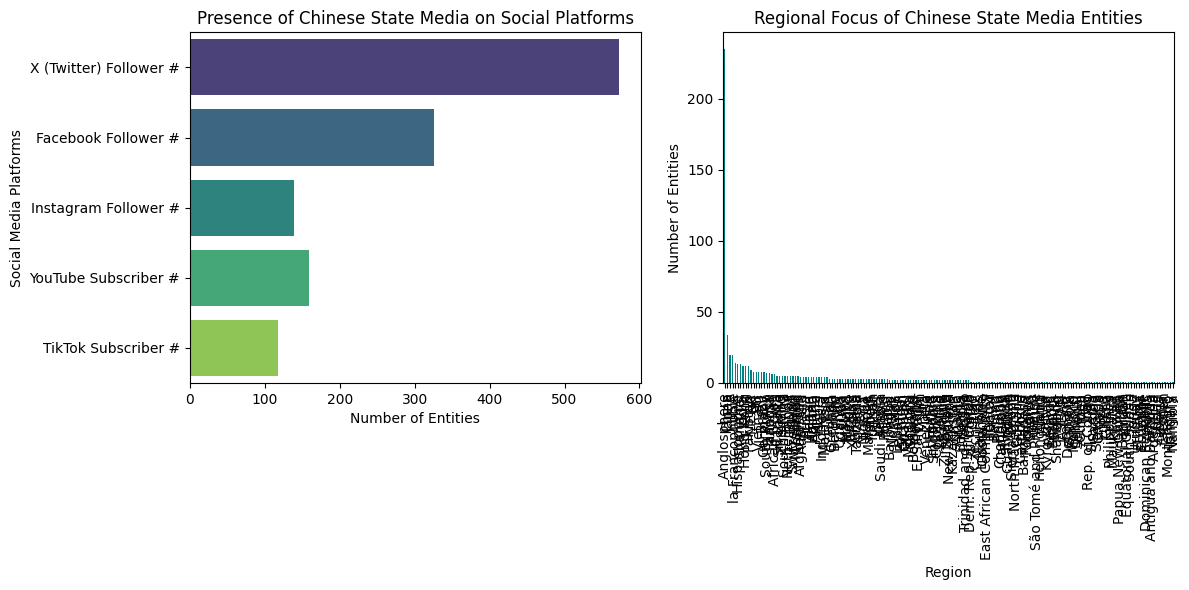

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing the platform presence
platform_columns = ['X (Twitter) Follower #', 'Facebook Follower #', 'Instagram Follower #',
                    'YouTube Subscriber #', 'TikTok Subscriber #']

platform_presence = data[platform_columns].notnull().sum()

# Analyzing the regional focus
region_focus = data['Region of Focus'].value_counts()

# Setting up the plot area
plt.figure(figsize=(12, 6))

# Plot for Platform Presence
plt.subplot(1, 2, 1)
sns.barplot(x=platform_presence.values, y=platform_presence.index, palette="viridis")
plt.title('Presence of Chinese State Media on Social Platforms')
plt.xlabel('Number of Entities')
plt.ylabel('Social Media Platforms')

# Plot for Regional Focus
plt.subplot(1, 2, 2)
region_focus.plot(kind='bar', color='teal')
plt.title('Regional Focus of Chinese State Media Entities')
plt.xlabel('Region')
plt.ylabel('Number of Entities')

plt.tight_layout()
plt.show()


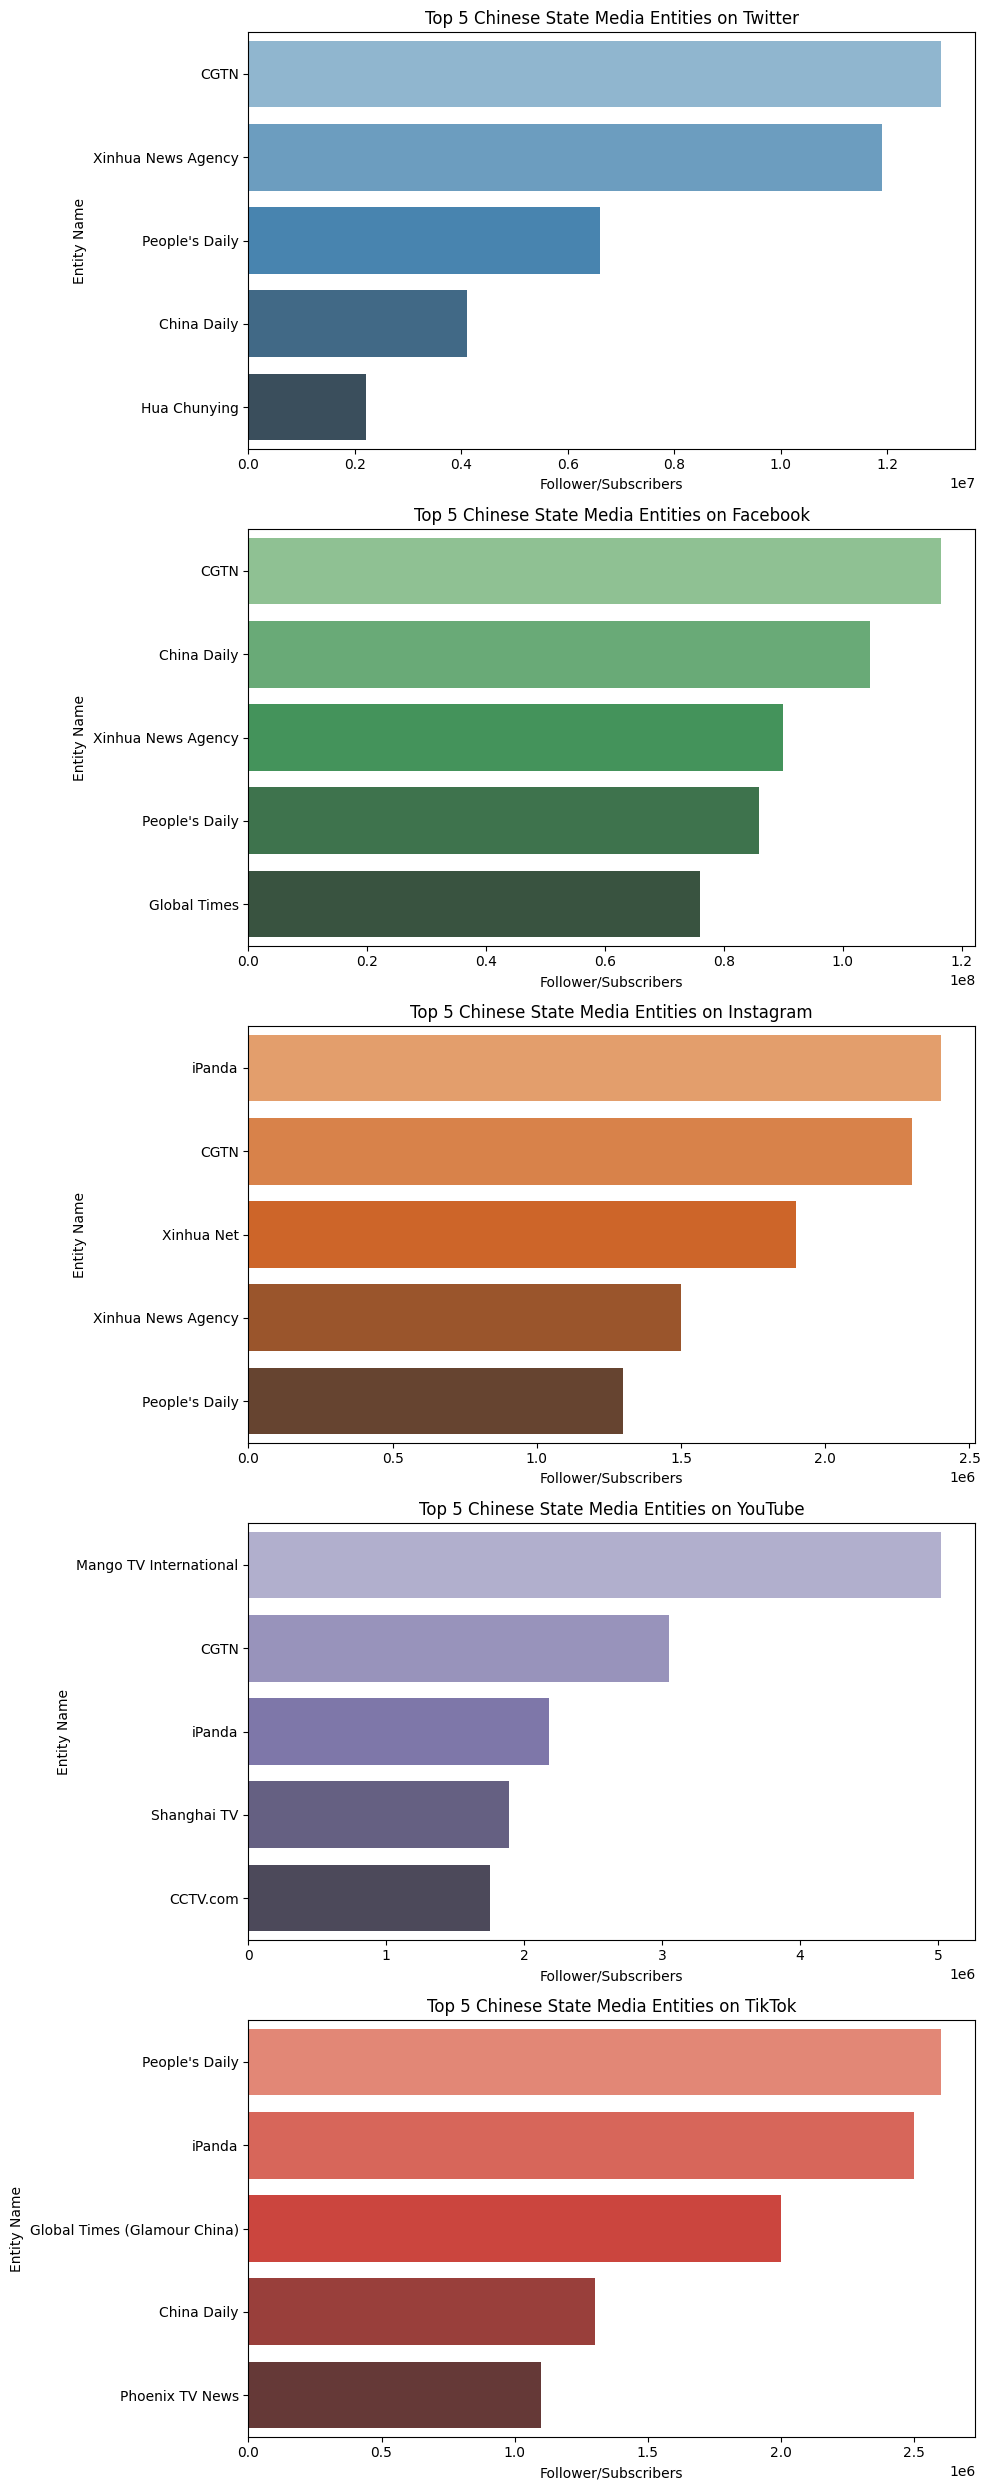

In [ ]:
# Analyzing the top entities on each platform based on follower/subscriber counts
# We'll consider the top 5 entities for each platform for a clearer visualization

# Function to get top entities for a given platform
def get_top_entities(platform_column):
    return data[['Name (English)', platform_column]].dropna().sort_values(by=platform_column, ascending=False).head(5)

# Getting top entities for each platform
top_twitter = get_top_entities('X (Twitter) Follower #')
top_facebook = get_top_entities('Facebook Follower #')
top_instagram = get_top_entities('Instagram Follower #')
top_youtube = get_top_entities('YouTube Subscriber #')
top_tiktok = get_top_entities('TikTok Subscriber #')

# Plotting the top entities for each platform
fig, axes = plt.subplots(5, 1, figsize=(10, 25))

# Function to plot bar chart for top entities
def plot_top_entities(ax, data, platform_name, color):
    sns.barplot(x=data.iloc[:, 1], y=data['Name (English)'], ax=ax, palette=color)
    ax.set_title(f'Top 5 Chinese State Media Entities on {platform_name}')
    ax.set_xlabel('Follower/Subscribers')
    ax.set_ylabel('Entity Name')

# Plotting
plot_top_entities(axes[0], top_twitter, 'Twitter', 'Blues_d')
plot_top_entities(axes[1], top_facebook, 'Facebook', 'Greens_d')
plot_top_entities(axes[2], top_instagram, 'Instagram', 'Oranges_d')
plot_top_entities(axes[3], top_youtube, 'YouTube', 'Purples_d')
plot_top_entities(axes[4], top_tiktok, 'TikTok', 'Reds_d')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame
# ...

def plot_top_entities(data, platform_name, color, file_name):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=data.iloc[:, 1], y=data['Name (English)'], palette=color)
    plt.title(f'Top 5 Chinese State Media Entities on {platform_name}')
    plt.xlabel('Follower/Subscribers')
    plt.ylabel('Entity Name')
    plt.savefig(file_name, format='svg')
    plt.close()

# Getting top entities for each platform
top_twitter = get_top_entities('X (Twitter) Follower #')
top_facebook = get_top_entities('Facebook Follower #')
top_instagram = get_top_entities('Instagram Follower #')
top_youtube = get_top_entities('YouTube Subscriber #')
top_tiktok = get_top_entities('TikTok Subscriber #')

# Plotting and saving each platform's chart
plot_top_entities(top_twitter, 'Twitter', 'Blues_d', 'top_twitter.svg')
plot_top_entities(top_facebook, 'Facebook', 'Greens_d', 'top_facebook.svg')
plot_top_entities(top_instagram, 'Instagram', 'Oranges_d', 'top_instagram.svg')
plot_top_entities(top_youtube, 'YouTube', 'Purples_d', 'top_youtube.svg')
plot_top_entities(top_tiktok, 'TikTok', 'Reds_d', 'top_tiktok.svg')



In [ ]:
# Function to get the top entity for each parent organization based on follower counts for a specific platform
def get_top_entity_by_parent_for_platform(platform_column):
    # Sorting entities within each parent group by follower counts
    sorted_data = data.sort_values(by=[platform_column, 'Parent entity (English)'], ascending=[False, True])

    # Dropping duplicates to keep the top entity for each parent group
    top_entities_by_parent = sorted_data.drop_duplicates(subset='Parent entity (English)')

    return top_entities_by_parent[['Parent entity (English)', 'Name (English)', platform_column]].sort_values(by=platform_column, ascending=False)

# Applying this function to Twitter
top_entity_twitter_by_parent = get_top_entity_by_parent_for_platform('X (Twitter) Follower #')

# Displaying the result for Twitter
top_entity_twitter_by_parent.head()

,Parent entity (English),Name (English),X (Twitter) Follower #
89,Central Publicity Department,CGTN,13000000.0
516,State Council,Xinhua News Agency,11900000.0
416,Central Committee of the Chinese Communist Party,People's Daily,6600000.0
461,Ministry of Foreign Affairs,Hua Chunying,2200000.0
283,United Front Work Department,China News Service Net (eCNS),645100.0


In [ ]:
# Function to get the top regions of focus (excluding China) for each social media platform based on follower counts
def get_top_regions_excluding_china(platform_column):
    # Group by region of focus and sum the follower counts for each region, excluding China
    grouped = data[data['Region of Focus'] != 'China'].groupby('Region of Focus')[platform_column].sum().reset_index()

    # Sorting the groups by follower count
    return grouped.sort_values(by=platform_column, ascending=False)

# Applying this function to each platform, excluding China
top_regions_twitter_excl_china = get_top_regions_excluding_china('X (Twitter) Follower #')
top_regions_facebook_excl_china = get_top_regions_excluding_china('Facebook Follower #')
top_regions_instagram_excl_china = get_top_regions_excluding_china('Instagram Follower #')
top_regions_youtube_excl_china = get_top_regions_excluding_china('YouTube Subscriber #')
top_regions_tiktok_excl_china = get_top_regions_excluding_china('TikTok Subscriber #')

# Displaying the results for each platform
top_regions_twitter_excl_china.head(), top_regions_facebook_excl_china.head(), top_regions_instagram_excl_china.head(), top_regions_youtube_excl_china.head(), top_regions_tiktok_excl_china.head()


(     Region of Focus  X (Twitter) Follower #
 5        Anglosphere              37994432.0
 170  la Francophonie               1078503.0
 159              USA                939612.0
 132         Shanghai                849004.0
 94              MENA                838617.0,
      Region of Focus  Facebook Follower #
 5        Anglosphere          592461865.0
 71             India           30617045.0
 170  la Francophonie           27366330.0
 114         Pakistan           15351600.0
 94              MENA           11274334.0,
      Region of Focus  Instagram Follower #
 5        Anglosphere             6985510.0
 159              USA              393906.0
 94              MENA              310845.0
 170  la Francophonie              271758.0
 62            Hainan              197716.0,
     Region of Focus  YouTube Subscriber #
 5       Anglosphere             6372766.0
 68            Hunan             5020000.0
 94             MENA             3413158.0
 132        Shanghai       

In [ ]:
hours = [
    'Anglosphere', 'Francophonie', 'USA', 'Shanghai', 'MENA',
    'Anglosphere', 'India', 'Francophonie', 'Pakistan', 'MENA',
    'Anglosphere', 'USA', 'MENA', 'la Francophonie', 'Hainan',
    'Anglosphere', 'Hunan', 'MENA', 'Shanghai', 'African Union',
    'Anglosphere', 'Myanmar', 'Hainan', 'MENA', 'Japan',
];

data = [[0, 0, 37], [0, 1, 1], [0, 2, 1], [0, 3, 0.8], [0, 4, 0.8],
        [1, 0, 12], [1, 1, 1], [1, 2, 0.6], [1, 3, 0.3], [1, 4, 0.1],
        [2, 0, 7], [2, 1, 0.3], [2, 2, 0.3], [2, 3, 0.25], [2, 4, 0.2],
        [3, 0, 7], [3, 1, 5], [3, 2, 3.5], [3, 3, 3.5], [3, 4, 1],
        [4, 0, 11], [4, 1, 2], [4, 2, 1], [4, 3, 0.6], [4, 4, 0.5]];

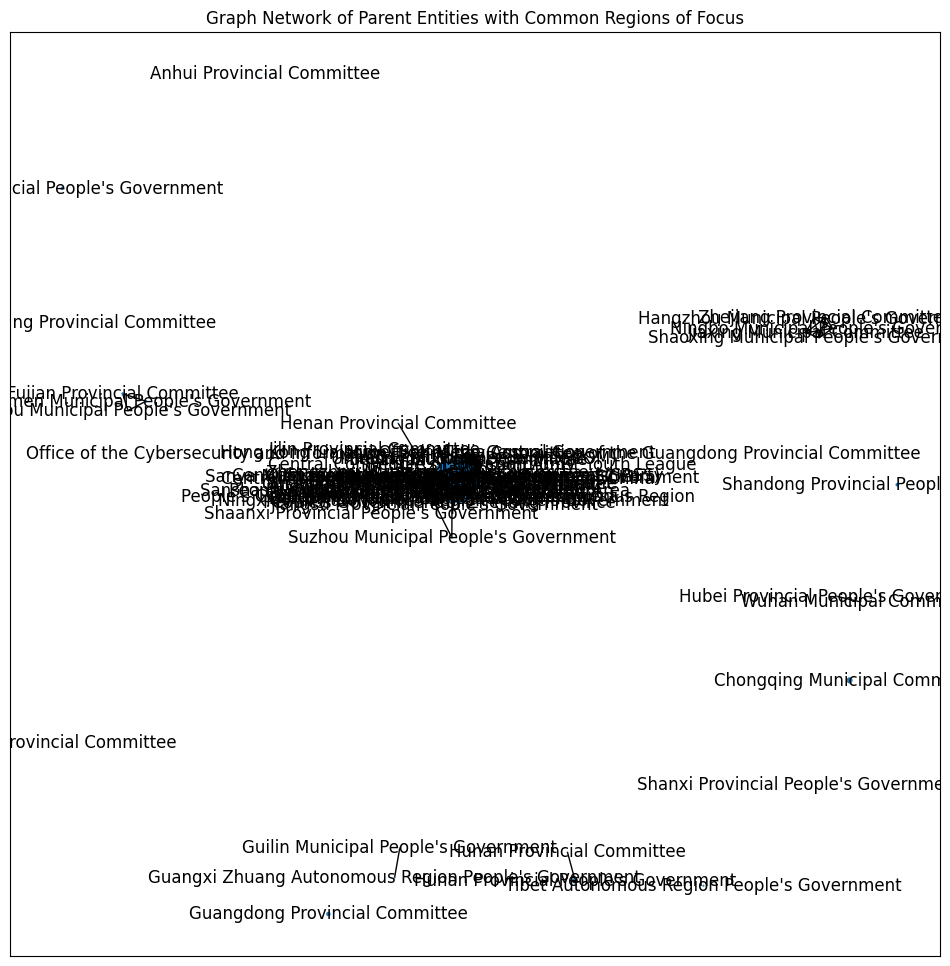

In [ ]:
import networkx as nx

# Step 1: Data Preparation

# Aggregating followers for each parent entity across all platforms
total_followers = data.groupby('Parent entity (English)')[['X (Twitter) Follower #', 'Facebook Follower #',
                                                           'Instagram Follower #', 'YouTube Subscriber #',
                                                           'TikTok Subscriber #']].sum()
total_followers['Total Followers'] = total_followers.sum(axis=1)

# Identifying common regions of focus
# Creating a dictionary where each key is a parent entity and the value is a set of regions of focus
regions_of_focus = data.groupby('Parent entity (English)')['Region of Focus'].apply(set).to_dict()

# Step 2: Graph Construction

# Creating the graph
G = nx.Graph()

# Adding nodes with the size attribute
for parent, followers in total_followers['Total Followers'].items():
    G.add_node(parent, size=followers)

# Adding edges for common regions of focus
for parent1 in regions_of_focus:
    for parent2 in regions_of_focus:
        if parent1 != parent2 and regions_of_focus[parent1].intersection(regions_of_focus[parent2]):
            G.add_edge(parent1, parent2)

# Step 3: Visualization
# Node size scaling factor
size_factor = 1000 / max(nx.get_node_attributes(G, 'size').values())

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # Positioning the nodes based on a force-directed algorithm

# Drawing nodes with size based on total followers
node_sizes = [G.nodes[node]['size'] * size_factor for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes)

# Drawing edges
nx.draw_networkx_edges(G, pos)

# Adding labels
nx.draw_networkx_labels(G, pos)

plt.title("Graph Network of Parent Entities with Common Regions of Focus")
plt.show()


In [3]:
import pandas as pd
import json
import networkx as nx

# Assuming 'data' is your DataFrame loaded from the Excel file
# Replace the file path with the path to your Excel file
data = pd.read_excel('/content/CANIS_PRC_state_media_on_social_media_platforms-2023-11-03.xlsx')

# Calculating total followers for each parent entity across all platforms
total_followers = data.groupby('Parent entity (English)')[['X (Twitter) Follower #', 'Facebook Follower #',
                                                           'Instagram Follower #', 'YouTube Subscriber #',
                                                           'TikTok Subscriber #']].sum()
total_followers['Total Followers'] = total_followers.sum(axis=1)

# Creating a dictionary of regions of focus for each parent entity
regions_of_focus = data.groupby('Parent entity (English)')['Region of Focus'].apply(set).to_dict()

# Preparing nodes and links for the JSON structure
nodes = []
links = []

# Adding nodes
for idx, (parent, row) in enumerate(total_followers.iterrows()):
    node = {
        "id": str(idx),
        "name": parent,
        "symbolSize": row['Total Followers'],
        "x": 0,  # Placeholder
        "y": 0,  # Placeholder
        "value": row['Total Followers'],
        "category": 0  # Placeholder for category
    }
    nodes.append(node)

# Adding links for common regions of focus
for i, parent1 in enumerate(total_followers.index):
    for j, parent2 in enumerate(total_followers.index):
        if i != j and regions_of_focus[parent1].intersection(regions_of_focus[parent2]):
            link = {
                "source": str(i),
                "target": str(j)
            }
            links.append(link)

# Placeholder for categories
categories = [{"name": f"Category {i}"} for i in range(len(total_followers))]

# Compiling the final structure
graph_network_json = {
    "nodes": nodes,
    "links": links,
    "categories": categories
}

# Convert to JSON string
graph_network_json_string = json.dumps(graph_network_json, indent=2)

# Optionally, write to a file
with open('graph_network.json', 'w') as json_file:
    json_file.write(graph_network_json_string)

print("JSON structure created successfully.")


JSON structure created successfully.


In [6]:
import pandas as pd
import json
import numpy as np
import networkx as nx


# Load your data
data = pd.read_excel('/content/CANIS_PRC_state_media_on_social_media_platforms-2023-11-03.xlsx')

# Calculate total followers for each parent entity across all platforms
total_followers = data.groupby('Parent entity (English)')[['X (Twitter) Follower #', 'Facebook Follower #',
                                                           'Instagram Follower #', 'YouTube Subscriber #',
                                                           'TikTok Subscriber #']].sum()
total_followers['Total Followers'] = total_followers.sum(axis=1)

# Selecting the top 20 parent entities based on total followers
top_20_parents = total_followers.nlargest(20, 'Total Followers')

# Creating a dictionary of regions of focus for each parent entity
regions_of_focus = data.groupby('Parent entity (English)')['Region of Focus'].apply(set).to_dict()

# Preparing nodes and links for the JSON structure
nodes = []
links = []

# Adding nodes for top 20 parent entities
for idx, (parent, row) in enumerate(top_20_parents.iterrows()):
    node = {
        "id": str(idx),
        "name": parent,
        "symbolSize": row['Total Followers'],
        "x": 0,  # Placeholder
        "y": 0,  # Placeholder
        "value": row['Total Followers'],
        "category": 0  # Placeholder for category
    }
    nodes.append(node)


# Function to generate random coordinates within a given range
def generate_random_coordinates(x_range, y_range):
    x = np.random.uniform(x_range[0], x_range[1])
    y = np.random.uniform(y_range[0], y_range[1])
    return x, y

# Define the range for x and y coordinates
x_range = (-400, 400)
y_range = (-200, 200)

# Update the nodes with random coordinates
for node in nodes:
    x, y = generate_random_coordinates(x_range, y_range)
    node['x'] = x
    node['y'] = y


# Adding links for common regions of focus among top 20 parent entities
for i, parent1 in enumerate(top_20_parents.index):
    for j, parent2 in enumerate(top_20_parents.index):
        if i != j and regions_of_focus[parent1].intersection(regions_of_focus[parent2]):
            link = {
                "source": str(i),
                "target": str(j)
            }
            links.append(link)

# Placeholder for categories (can be adjusted as needed)
categories = [{"name": f"Category {i}"} for i in range(20)]

# Compiling the final structure
graph_network_json = {
    "nodes": nodes,
    "links": links,
    "categories": categories
}

# Scale the symbolSize from 1 to 20
min_size, max_size = 1, 20
max_followers = top_20_parents['Total Followers'].max()
min_followers = top_20_parents['Total Followers'].min()

scaled_symbol_size = top_20_parents['Total Followers'].apply(
    lambda x: min_size + (max_size - min_size) * (x - min_followers) / (max_followers - min_followers)
)

# Update the nodes with the scaled symbol size
for idx, (parent, row) in enumerate(top_20_parents.iterrows()):
    size = scaled_symbol_size.loc[parent]
    nodes[idx]['symbolSize'] = size

# Function to get languages used by each parent entity
def get_parent_languages(data, parent_entities):
    parent_languages = {}
    for parent in parent_entities:
        languages = set(data[data['Parent entity (English)'] == parent]['Language'])
        parent_languages[parent] = languages
    return parent_languages

# Getting languages for the top 20 parent entities
top_20_parent_languages = get_parent_languages(data, top_20_parents.index)

# Creating a mapping of languages to categories
language_categories = {}
category_counter = 0
for parent, languages in top_20_parent_languages.items():
    languages = tuple(sorted(languages))  # Sorting for consistency
    if languages not in language_categories:
        language_categories[languages] = category_counter
        category_counter += 1

# Update the nodes with the category based on language
for node in nodes:
    parent_entity = node['name']
    node_languages = tuple(sorted(top_20_parent_languages[parent_entity]))
    node['category'] = language_categories[node_languages]

# Creating the categories for JSON
categories_json = [{"name": f"Category {i}"} for i in range(len(language_categories))]

# Compiling the updated JSON structure with language-based categories
graph_network_json_with_languages = {
    "nodes": nodes,
    "links": links,
    "categories": categories_json
}


# Function to divide the page into sections based on categories
def get_category_sections(categories, x_range, y_range):
    num_categories = len(categories)
    section_width = (x_range[1] - x_range[0]) / num_categories
    sections = {}
    for i, category in enumerate(categories):
        section_x_range = (x_range[0] + i * section_width, x_range[0] + (i + 1) * section_width)
        sections[category['name']] = (section_x_range, y_range)
    return sections

# Function to generate random coordinates within a given section
def generate_coordinates_in_section(section):
    x_range, y_range = section
    x = np.random.uniform(x_range[0], x_range[1])
    y = np.random.uniform(y_range[0], y_range[1])
    return x, y

# Define the range for x and y coordinates
x_range = (-400, 400)
y_range = (-200, 200)

# Get sections for each category
sections = get_category_sections(categories_json, x_range, y_range)

# Assign coordinates to nodes based on their category
for node in nodes:
    category_name = f"Category {node['category']}"
    section = sections[category_name]
    x, y = generate_coordinates_in_section(section)
    node['x'] = x
    node['y'] = y

# Compile the JSON structure with updated node positions
graph_network_json_with_positions = {
    "nodes": nodes,
    "links": links,
    "categories": categories_json
}

# Selecting a single language for each parent entity
single_language_per_parent = data.groupby('Parent entity (English)')['Language'].apply(lambda x: x.iloc[0])

# Updating the nodes with a single language
for node in nodes:
    parent_entity = node['name']
    node['language'] = single_language_per_parent[parent_entity]
    print(node['language'])

# Building the graph to identify isolated nodes
G = nx.Graph()
for node in nodes:
    G.add_node(node['name'])

for link in links:
    G.add_edge(nodes[int(link['source'])]['name'], nodes[int(link['target'])]['name'])

# Identifying isolated nodes
isolated_nodes = [node for node in G.nodes if G.degree(node) == 0]

# Removing isolated nodes from the nodes list
nodes = [node for node in nodes if node['name'] not in isolated_nodes]

# Compiling the updated JSON structure
graph_network_json_updated = {
    "nodes": nodes,
    "links": links,
    "categories": categories_json  # Assuming categories are already created
}

# Convert to JSON string
graph_network_json_string = json.dumps(graph_network_json, indent=2)

# Optionally, write to a file
with open('graph_network_20.json', 'w') as json_file:
    json_file.write(graph_network_json_string)

print("JSON structure created successfully.")


English
English
English
German
English
English
English
Chinese
English
Chinese
English
English
English
English
English
English
Chinese
English
English
English
JSON structure created successfully.


In [5]:
print("language_categories:", len(single_language_per_parent))


language_categories: 69
